In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')


C:\Users\prthm\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\prthm\OneDrive\Desktop\DATASETS\car_price.csv")

In [3]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
df.duplicated().sum() #Checking number of duplicate rows

313

In [5]:
#To remove the duplicate rows 
df.drop_duplicates(inplace=True)
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [6]:
del df["ID"] #Deleting ID column since its not useful

In [7]:
del df["Doors"]

In [8]:
df["Levy"]=df["Levy"].replace('-',0)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4


In [9]:
dtime = dt.datetime.now()
df['Age'] = dtime.year - df['Prod. year']
df = df.drop('Prod. year',axis=1)

In [10]:
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,25
19233,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,13
19234,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,14
19235,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4,17


In [11]:
df['Mileage'] =df['Mileage'].str.replace('km',"")
df.Mileage = df.Mileage.astype('Int64')

In [12]:
df.Mileage.head()

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: Int64

In [13]:
# Replacing 'Turbo' with '' 
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')
# Converting dtype to float
df['Engine volume'] = df['Engine volume'].astype('float64')

In [14]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


In [15]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  Int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: Int64(1), float64(2), int64(3), objec

In [17]:
df['Levy'] = df['Levy'].astype('float64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  Int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: Int64(1), float64(3), int64(3), objec

In [19]:
numeric_data = df.select_dtypes(exclude=object)


In [20]:
for col in numeric_data:
    q1 = df[col].quantile(0.75)   
    q2 = df[col].quantile(0.25)
    iq = q1 - q2
    
    low = q2-1.5*iq
    high = q1-1.5*iq
    outlier = ((numeric_data[col]>high) | (numeric_data[col]<low)).sum()

    total = numeric_data[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")

Total Outliers in Price are :18924---100.0%
Total Outliers in Levy are :18924---100.0%
Total Outliers in Engine volume are :17625---93.14%
Total Outliers in Mileage are :17703---93.55%
Total Outliers in Cylinders are :4765---25.18%
Total Outliers in Airbags are :16540---87.4%
Total Outliers in Age are :18082---95.55%


In [21]:
if outlier>0:
    df = df.loc[(df[col]<=high) & (df[col]>=low) ]

In [22]:
obdata = df.select_dtypes(include=object)
numdata = df.select_dtypes(exclude=object)

In [23]:
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = lab.fit_transform(obdata.iloc[:,i])  

In [24]:
data = pd.concat([obdata,numdata],axis=1)


In [25]:
data

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
15,30,23,3,1,3,0,1,0,14,549,1079.0,2.0,74146,4.0,12,6
36,30,24,3,0,3,2,1,0,11,51746,1077.0,2.0,10200,4.0,12,5
56,19,80,3,1,3,2,0,0,7,87112,0.0,2.0,5323,4.0,0,5
59,4,53,7,0,3,0,1,0,11,23521,781.0,1.4,22000,4.0,6,6
81,30,180,7,1,3,0,1,0,14,7527,830.0,1.5,27656,4.0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19155,9,75,5,0,1,0,1,1,7,24000,2266.0,1.5,19000,4.0,0,6
19157,13,20,7,1,3,0,1,0,2,3607,1077.0,2.0,23474,4.0,12,5
19180,10,149,7,1,2,0,1,0,12,63886,1076.0,2.0,5305,4.0,4,4
19182,30,30,7,1,1,0,1,0,1,9722,609.0,2.5,127515,4.0,12,6


In [26]:
x= data.drop('Price',axis=1)
y= data['Price']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
mlp = MLPRegressor(hidden_layer_sizes=(140,), max_iter=1000,random_state=42)

In [29]:
mlp.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(140,), max_iter=1000, random_state=42)

In [30]:
y_pred = mlp.predict(x_test)

In [31]:
mlp.score(x_test,y_test)

0.09900935522232401

Text(0.5, 1.0, 'Actual vs. Predicted')

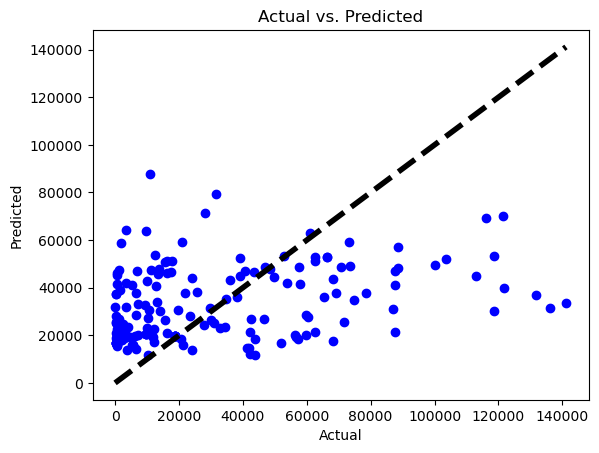

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # This adds the line of perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [33]:
data2 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [34]:
data_subset = data2.head(20)  # Adjust the number based on how many you want to display


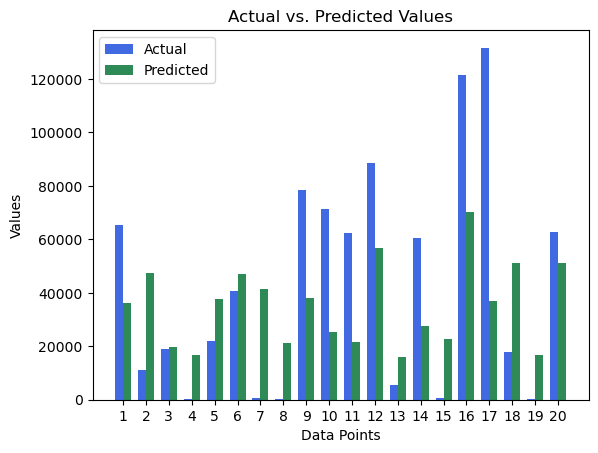

In [35]:
N = len(data_subset)
ind = np.arange(N)  # the x locations for the groups
width = 0.35 
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot actual values
rects1 = ax.bar(ind, data_subset['Actual'], width, color='royalblue')

# Plot predicted values
rects2 = ax.bar(ind + width, data_subset['Predicted'], width, color='seagreen')

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Data Points')
ax.set_ylabel('Values')
ax.set_title('Actual vs. Predicted Values')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((ind + 1))

ax.legend((rects1[0], rects2[0]), ('Actual', 'Predicted'))
plt.show()

In [37]:
correlation_matrix = data.corr()
price_correlations = correlation_matrix["Price"].sort_values(ascending=False)


In [38]:
correlation_matrix


,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
Manufacturer,1.000000,-0.335769,0.000735,-0.042344,-0.014018,0.117906,-0.061380,0.005832,-0.043242,-0.147316,-0.133315,0.162113,0.051765,0.006259,0.398595,-0.012855
Model,-0.335769,1.000000,-0.086055,-0.028264,-0.157543,-0.042841,-0.149297,-0.026516,0.083002,0.238251,0.114899,0.088222,-0.039453,0.148786,-0.254159,-0.092074
Category,0.000735,-0.086055,1.000000,0.124605,0.103684,-0.044838,0.198544,-0.098989,-0.108910,-0.141954,0.042728,0.115343,0.141827,0.010432,0.187623,0.063589
Leather interior,-0.042344,-0.028264,0.124605,1.000000,-0.067216,-0.306503,0.140420,-0.211850,-0.028880,0.023995,0.118410,0.175455,0.106471,0.064101,0.151877,-0.034771
Fuel type,-0.014018,-0.157543,0.103684,-0.067216,1.000000,0.132337,-0.019972,-0.023891,-0.009752,-0.128251,0.255328,0.016217,-0.159191,0.074942,0.227575,0.041995
Gear box type,0.117906,-0.042841,-0.044838,-0.306503,0.132337,1.000000,-0.124621,0.030561,-0.054352,0.311084,-0.220471,0.042277,-0.084929,0.157310,0.061289,0.080117
Drive wheels,-0.061380,-0.149297,0.198544,0.140420,-0.019972,-0.124621,1.000000,0.042567,0.067226,-0.179898,0.104104,-0.146695,0.058182,-0.139489,-0.117662,0.034607
Wheel,0.005832,-0.026516,-0.098989,-0.211850,-0.023891,0.030561,0.042567,1.000000,0.015396,-0.048593,0.225752,-0.158371,-0.050788,-0.076889,-0.197192,-0.043488
Color,-0.043242,0.083002,-0.108910,-0.028880,-0.009752,-0.054352,0.067226,0.015396,1.000000,-0.029068,0.057876,-0.077298,-0.063296,-0.061489,-0.090783,0.038181
Price,-0.147316,0.238251,-0.141954,0.023995,-0.128251,0.311084,-0.179898,-0.048593,-0.029068,1.000000,-0.038661,0.260483,-0.134983,0.302858,-0.321330,-0.048168


<AxesSubplot:>

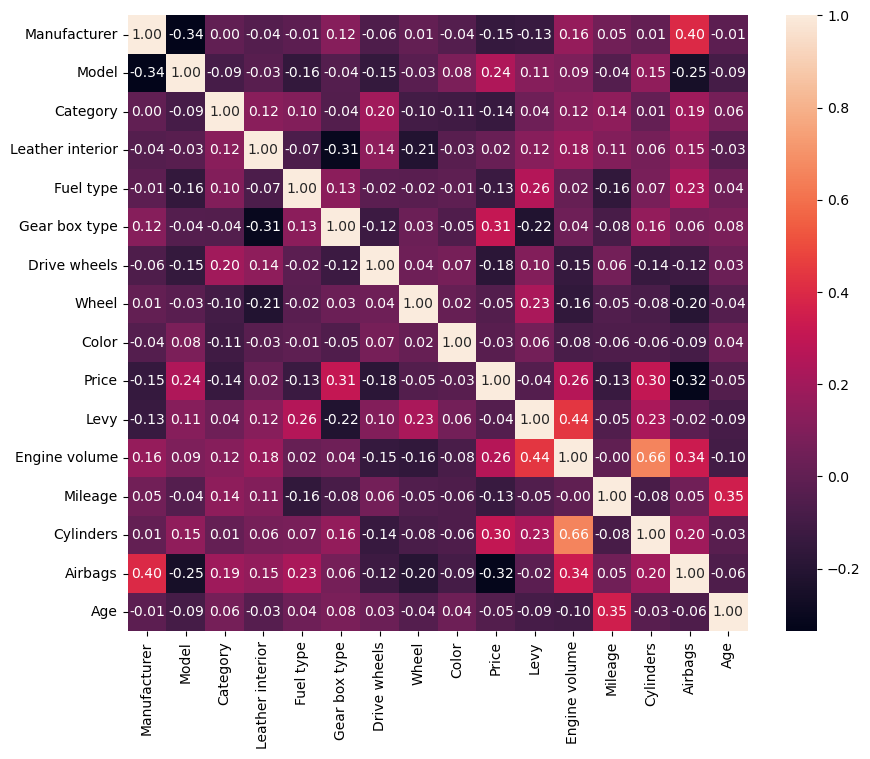

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='rocket')